In [2]:
import pyspark
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import NaiveBayes
from pyspark.mllib.linalg import Vectors
sc = pyspark.SparkContext('local[*]')

In [154]:
import matplotlib.pyplot as plt
def TryModel(testing_set):
    
    testing_set_rdd = sc.parallelize(testing_set)
    
    home_win_model_predicts_home = 0
    home_win_model_predicts_draw = 0
    home_win_model_predicts_away = 0
    draw_model_predicts_home = 0
    draw_model_predicts_draw = 0
    draw_model_predicts_away = 0
    away_win_model_predicts_home = 0
    away_win_model_predicts_draw = 0
    away_win_model_predicts_away = 0
    for bet in testing_set:
        tobj = Vectors.dense(bet[1])
        if bet[0] == 1:
            if modelbayes1.predict(tobj) == 1:
                home_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                home_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                home_win_model_predicts_away += 1
        elif bet[0] == 0:
            if modelbayes1.predict(tobj) == 1:
                draw_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                draw_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                draw_model_predicts_away += 1
        elif bet[0] == -1:
            if modelbayes1.predict(tobj) == 1:
                away_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                away_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                away_win_model_predicts_away += 1
        #print("Most probable value for ", tobj, " : ", modelbayes1.predict(tobj), "-> REAL RESULT: ", bet[0])

    print("Detailed Statistics")
    labels = ['home_win_model_predicts_home', 'home_win_model_predicts_draw', 'home_win_model_predicts_away',
    'draw_model_predicts_home', 'draw_model_predicts_draw', 'draw_model_predicts_away',
    'away_win_model_predicts_home', 'away_win_model_predicts_draw', 'away_win_model_predicts_away']
    sizes = [home_win_model_predicts_home, home_win_model_predicts_draw, home_win_model_predicts_away, 
            draw_model_predicts_home, draw_model_predicts_draw, draw_model_predicts_away,
            away_win_model_predicts_home, away_win_model_predicts_draw, away_win_model_predicts_away]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
        
    print("Total hits")
    labels = 'Hits', 'No-Hits'
    sizes = [(home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set), 
             100 - (home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set)]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
    
    print("Home win hits")
    sizes = [(home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count(), 
             100 - (home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count()]
    explode = (0.1, 0.0)


    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

    print("Draw hits")
    sizes = [(draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count(), 
             100 - (draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count()]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

    print("Away win hits")
    sizes = [(away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count(), 
             100 - (away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count()]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

In [136]:
from random import shuffle

def remove_duplicates(lst):
    seen = set()
    seen_add = seen.add
    return [x for x in lst if not (x in seen or seen_add(x))]

def result_to_numeric(result):
    if(result == 'H'):
        return 1
    elif(result == 'D'):
        return 0
    elif(result == 'A'):
        return -1

def group(lst):
    grouped_bets = []
    iteration = 0
    for index in range(len(lst)/3):
        if lst[iteration*3] != "" and lst[iteration*3 + 1] != "" and lst[iteration*3 + 2] != "":
            try:
                grouped_bets.append(float(lst[iteration*3]))
                grouped_bets.append(float(lst[iteration*3 + 1]))
                grouped_bets.append(float(lst[iteration*3 + 2]))
            except ValueError:
                raise ValueError("Could not convert to float some of these: ", lst[iteration*3] + "_" + lst[iteration*3 + 1] + "_" + lst[iteration*3 +2])
        iteration += 1
    return grouped_bets

Bet Houses: [u'B365', u'BS', u'BW', u'GB', u'IW', u'LB', u'SB', u'SJ', u'VC', u'WH']
[LabeledPoint(0.0, [1.36,4.5,9.0,1.36,4.33,7.5,1.3,4.8,8.2,1.36,4.5,9.0,1.4,4.0,6.5,1.33,4.0,8.0,1.35,4.2,8.0,1.4,4.33,8.5,1.35,5.0,7.0,1.36,4.0,7.0]), LabeledPoint(1.0, [1.33,4.33,12.0,1.33,4.33,8.5,1.37,4.0,10.0,1.35,4.0,10.0,1.35,4.0,8.0,1.33,4.0,8.0,1.35,4.2,8.5,1.33,4.5,10.0,1.36,4.5,11.0,1.33,4.0,8.5]), LabeledPoint(0.0, [5.5,3.6,1.67,4.75,3.5,1.73,5.0,3.75,1.62,5.0,3.6,1.67,4.8,3.4,1.65,5.0,3.75,1.67,5.0,3.6,1.6,4.5,3.75,1.73,5.5,4.0,1.67,5.0,3.6,1.7]), LabeledPoint(-1.0, [2.9,2.8,2.6,2.8,2.75,2.5,3.1,2.7,2.4,2.75,2.75,2.6,2.7,2.7,2.6,2.88,2.8,2.38,2.85,2.75,2.5,3.0,2.63,2.6,2.75,2.75,2.6,2.75,2.75,2.5]), LabeledPoint(1.0, [2.15,3.1,3.6,2.1,3.1,3.2,2.25,3.1,2.9,2.15,3.0,3.3,2.1,3.0,3.1,2.0,3.0,3.5,2.1,3.1,3.3,2.1,3.0,3.4,2.1,2.88,3.6,2.2,3.1,3.15])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.27447432, -1.32432444, -0.78869045

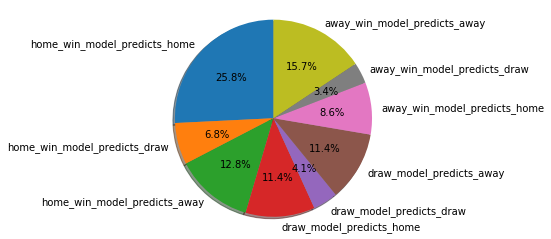

Total hits


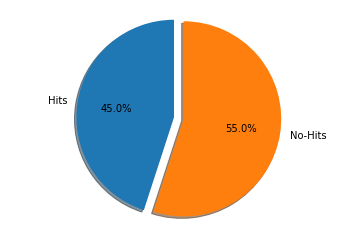

Home win hits


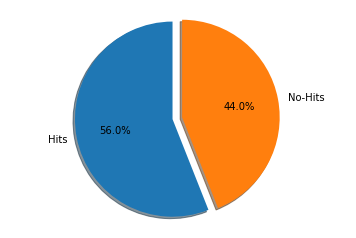

Draw hits


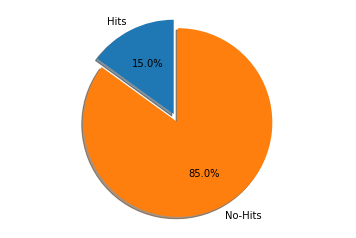

Away win hits


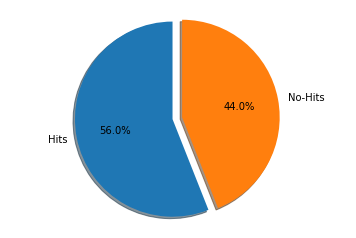

In [155]:
bets_csv_file = sc.textFile("../Data/Interim/main_competitions.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:38])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:38])))\
        .filter(lambda element : len(element[1]) == len(bet_houses) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)

Bet Houses: [u'WH', u'SB', u'IW', u'GB']
[LabeledPoint(0.0, [2.05,3.2,3.75,2.1,3.25,3.75]), LabeledPoint(1.0, [1.65,3.7,5.5,1.6,3.55,5.25]), LabeledPoint(1.0, [1.95,3.4,3.9,1.85,3.4,4.05]), LabeledPoint(1.0, [4.2,3.9,1.75,4.9,3.8,1.7]), LabeledPoint(0.0, [2.15,3.5,3.2,2.1,3.2,3.15])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.21205387, -1.32694331, -0.82753008]), '\n  factor probabilities (log of): ', array([[-1.80177428, -1.6728673 , -1.86809634, -1.83162175, -1.71385798,
        -1.88029084],
       [-2.05968296, -1.68102047, -1.65033051, -2.07782947, -1.71747075,
        -1.6627649 ],
       [-2.31520059, -1.70823427, -1.46860467, -2.32933446, -1.75289576,
        -1.51781783]]), '\n')
('Accuracy of the model obtained on training data : ', 0.502510985561833, '\n')
Detailed Statistics


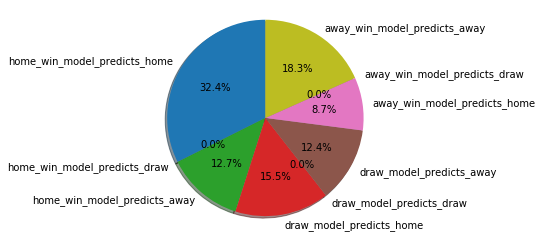

Total hits


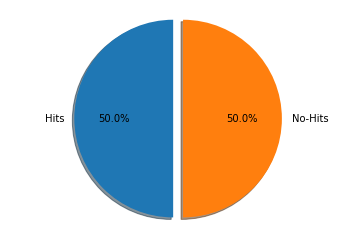

Home win hits


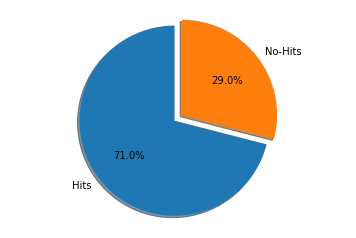

Draw hits


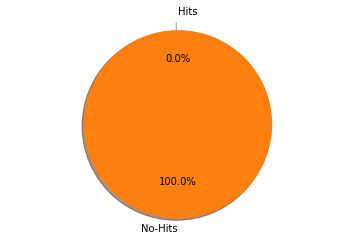

Away win hits


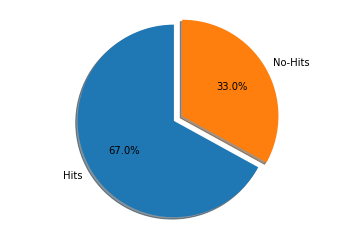

In [157]:
bets_csv_file = sc.textFile("../Data/Interim/main_competitions_1819.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:20])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:20])))\
        .filter(lambda element : len(element[1]) == (len(bet_houses)-2) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)